In [1]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

#helPPP
import numpy as np
import pandas as pd
from math import isnan
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix






#standard libraries
import time
import threading
import functools
import importlib
import warnings
warnings.filterwarnings("ignore")

#data analysis libraries
import seaborn as sns
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LarsCV
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot



modelsNames = ['Линейная регрессия',
              'Гребневая регрессия',
              'Лассо-регрессия',
              'Метод регрессии Эластичная сеть',
              'Метод наименьших углов',
              'Байесовская гребневая регрессия',
              'Метод k-ближайших соседей',
              'Деревья регрессии',
              'Линейный метод опорных векторов (регрессия)',
              'Метод опорных векторов (регрессия)',
              'AdaBoost (регрессия)',
              'Bagging (регрессия)',
              'Экстра-деревья (регрессия)',
              'Градиентный boosting (регрессия)',
              'Случайный лес (регрессия)']

# Настройка параметров оценивания алгоритма
num_folds = 10
n_iter = 1000
n_estimators = 100
scoring = 'r2'

models = []
models.append(('Линейная регрессия', LinearRegression()))
models.append(('Гребневая регрессия', Ridge()))
models.append(('Лассо-регрессия', Lasso()))
models.append(('Метод регрессии Эластичная сеть', ElasticNet()))
models.append(('Метод наименьших углов', LarsCV()))
models.append(('Байесовская гребневая регрессия', BayesianRidge(n_iter=n_iter)))
models.append(('Метод k-ближайших соседей', KNeighborsRegressor()))
models.append(('Деревья регрессии', DecisionTreeRegressor()))
models.append(('Линейный метод опорных векторов (регрессия)', LinearSVR()))
models.append(('Метод опорных векторов (регрессия)', SVR()))
models.append(('AdaBoost (регрессия)', AdaBoostRegressor(n_estimators=n_estimators)))
models.append(('Bagging (регрессия)', BaggingRegressor(n_estimators=n_estimators)))
models.append(('Экстра-деревья (регрессия)', ExtraTreesRegressor(n_estimators=n_estimators)))
models.append(('Градиентный boosting (регрессия)', GradientBoostingRegressor(n_estimators=n_estimators)))
models.append(('Случайный лес (регрессия)', RandomForestRegressor(n_estimators=n_estimators)))


#visualisation libraries
import matplotlib.pyplot as plt
from ipywidgets import Layout
import ipywidgets as widgets

#---------------------------------------
#--------------------------test spot-------
#---------------------------------------

import MyDataUpload
importlib.reload(MyDataUpload)

test = widgets.Output(layout={'border': '1px solid black'})

DataUpload = MyDataUpload.main(test)
tab = widgets.Tab(
    children = [DataUpload[0],]
)

test.clear_output()

clear_report = widgets.Button(
    description='Очистить'
)


def ClearReport(b):
    test.clear_output()

clear_report.on_click(ClearReport)

display(DataUpload[0], test, clear_report)


#2-27
#кол-во строк для вывода 24
#подправить


Output(layout=Layout(border='1px solid black'))

Button(description='Очистить', style=ButtonStyle())

In [2]:
sns.set(font_scale=3)

In [5]:
df = MyDataUpload.main(test)[1]
data = df.copy()
filter_largeGood = data['Качество']==1
dataGood = data.loc[filter_largeGood].copy()
dataGood = dataGood.iloc[:,2:]
filter_largeBad = data['Качество']==2
dataBad = data.loc[filter_largeBad].copy()
dataBad = dataBad.iloc[:,2:]
data = data.iloc[:,2:]


data = dataGood.copy()
data.iloc[:,0:]

,Геол. Зона,Qoil_cum 30D/FracN_fact,Qoil_cum 60D/FracN_fact,Qoil_cum 90D/FracN_fact,Qoil_cum 180D/FracN_fact,Qoil_cum 360D/FracN_fact,Qoil_cum 30D,Qoil_cum 60D,Qoil_cum 90D,Qoil_cum 180D,...,Доля проппанта на жидкости типа LG,Доля проппанта на жидкости типа DX,"Средний расход жидкости ГРП, м3/мин","Закачано жид-ти SW на ОГРП, доля","Закачано жид-ти LG на ОГРП, доля","Закачано жид-ти DX на ОГРП, доля","Общий объем закаченной жидкости ОГРП, м3","Рпл. нач, ат.","Рпл. после МГРП, ат.",delta P
1,Смешанная,24.720400,81.688800,179.903920,533.800000,1294.179996,123.602000,408.444000,899.519600,2669.0,...,0.057217,0.880312,6.782143,0.357691,0.205200,0.437109,8446.400000,NaN,NaN,NaN
8,Зона 2,60.544091,140.126817,169.585231,337.400000,NaN,908.161365,2101.902261,2543.778467,5061.0,...,0.480064,0.468917,9.282857,0.168849,0.600118,0.231032,15024.833098,239.0,371.0,132.0
9,Смешанная,70.803585,137.171666,194.735729,332.235294,NaN,1203.660937,2331.918321,3310.507400,5648.0,...,0.443863,0.532903,13.027174,0.109313,0.502850,0.387837,20586.920000,239.0,286.0,47.0
12,Зона 1,65.880124,102.311573,139.361317,332.000000,638.926817,988.201858,1534.673602,2090.419760,4980.0,...,0.093638,0.849648,8.100000,0.327779,0.359252,0.312969,11832.165302,239.0,272.5,33.5
16,Зона 2,134.740187,192.621660,248.468185,406.071429,NaN,1886.362621,2696.703235,3478.554587,5685.0,...,0.509585,0.480869,9.378125,0.047246,0.606353,0.346401,16241.199997,239.0,305.0,66.0
18,Зона 2,108.692681,191.956511,257.659982,484.333333,NaN,1630.390214,2879.347665,3864.899726,7265.0,...,0.303003,0.563447,9.448936,0.446592,0.311321,0.242086,15487.929506,239.0,305.0,66.0
21,Зона 1,80.961369,146.044460,248.932112,453.222222,NaN,1457.304646,2628.800278,4480.778018,8158.0,...,0.986535,0.011129,10.977879,0.002337,0.986535,0.011129,24684.349700,239.0,335.6,96.6


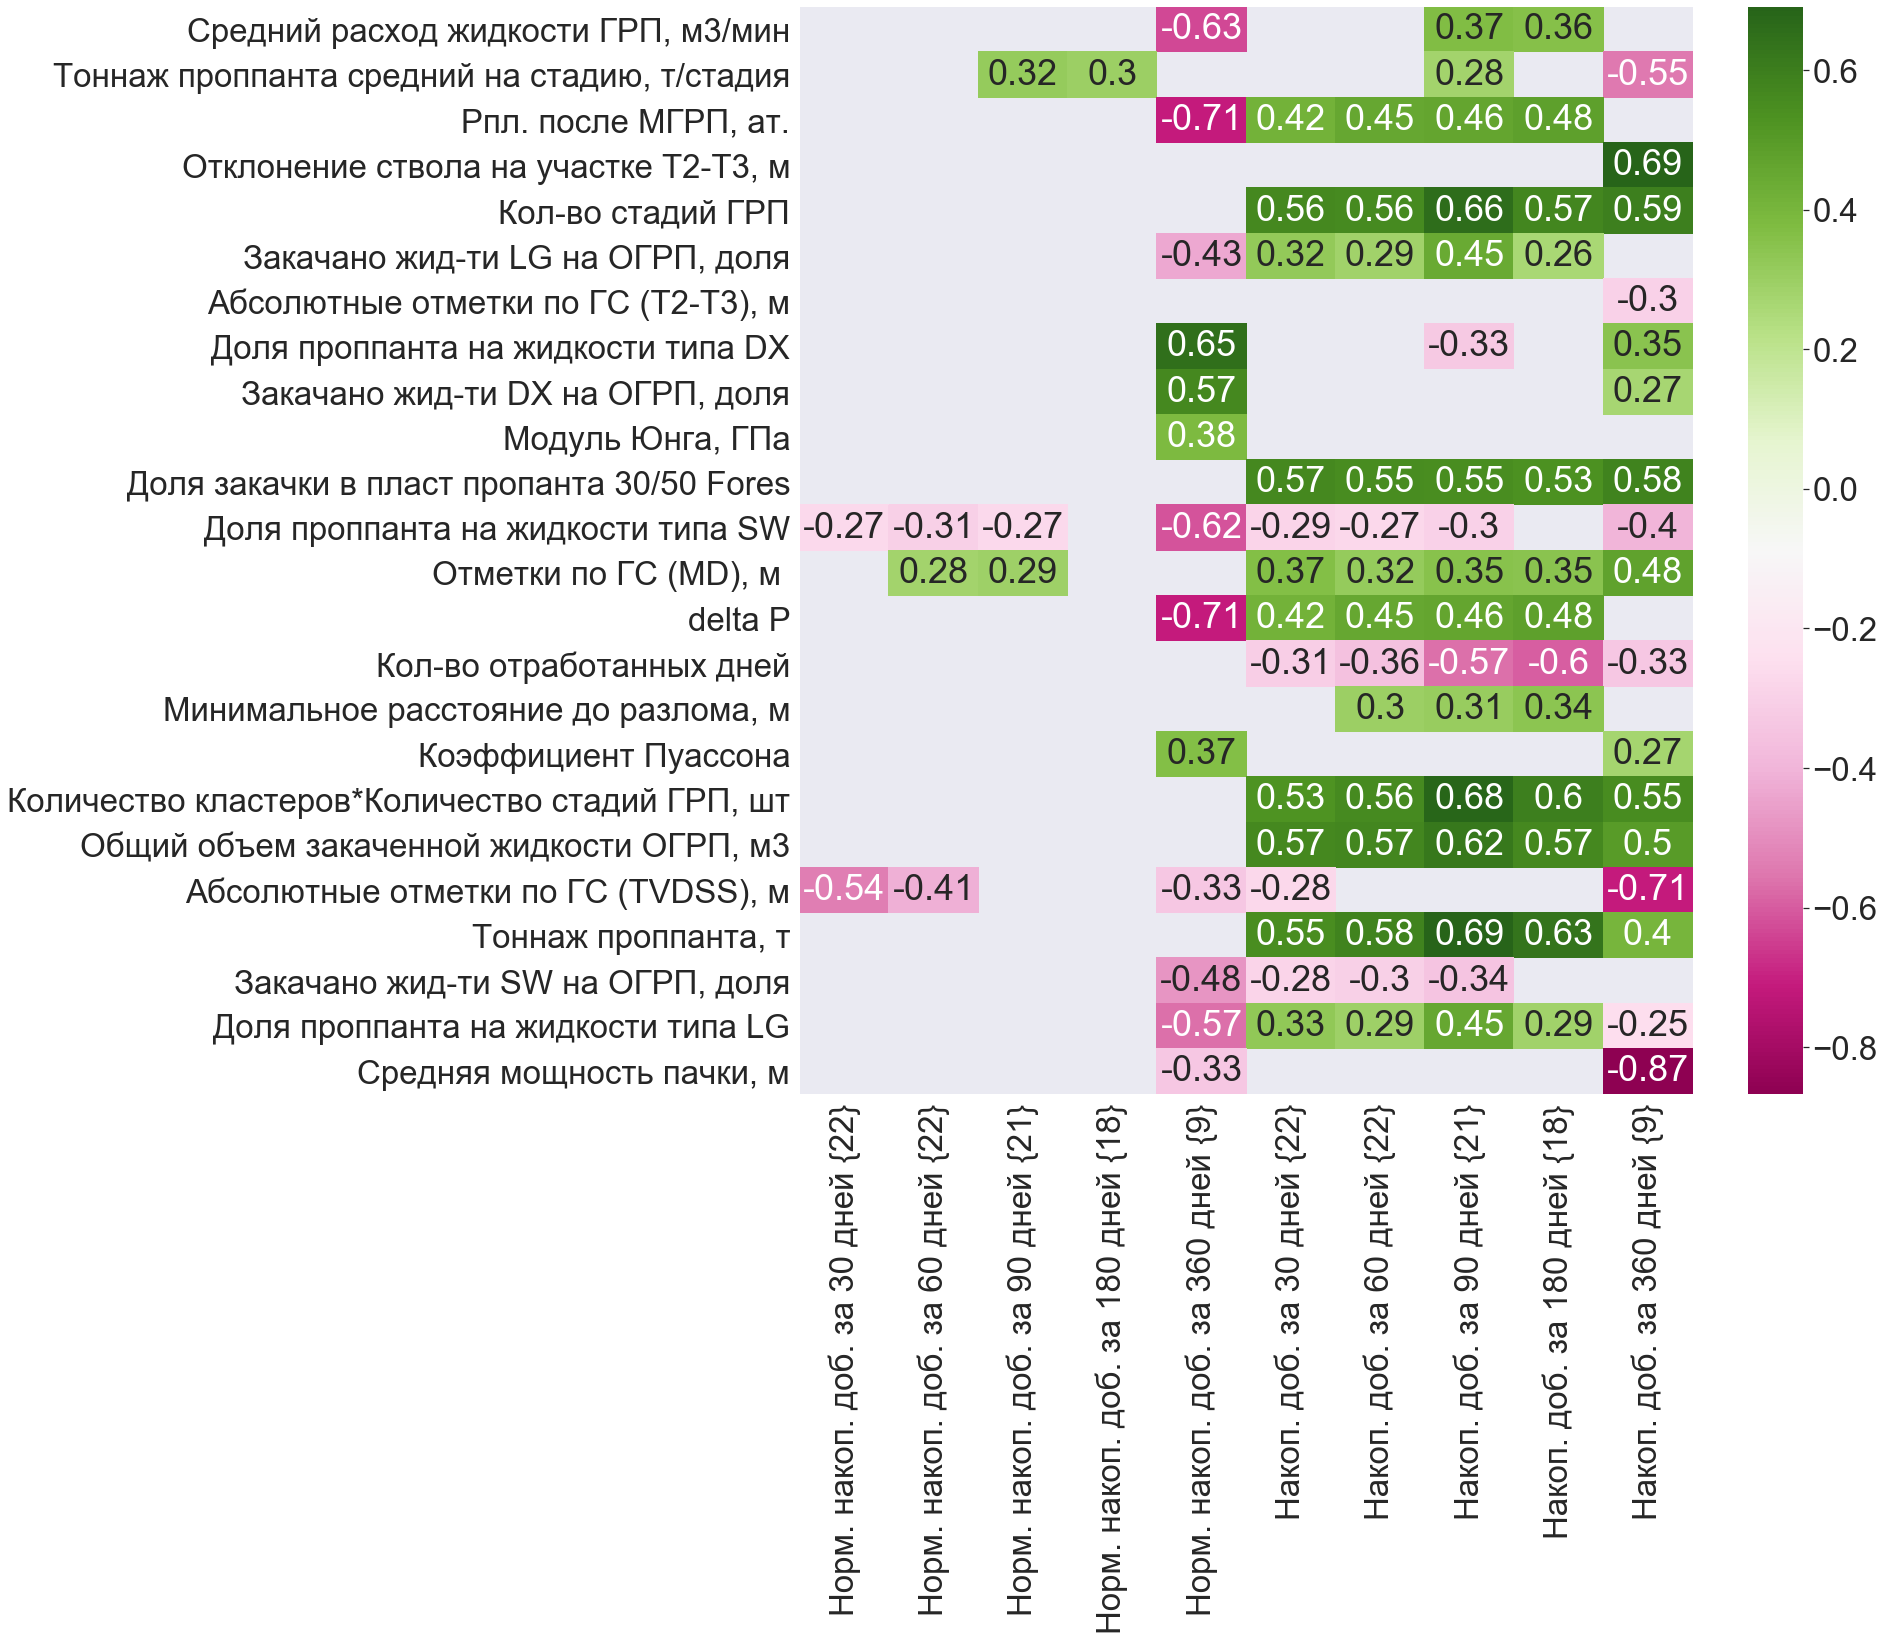

In [13]:


wantColumns = list(data.iloc[:,1:11])
for OldName in wantColumns:
    NewName = OldName+' {'+str(len(data.dropna(subset=[OldName, ]).index))+'}'
    data.rename(columns={OldName: NewName}, inplace=True)
wantColumns = list(data.iloc[:,1:11])
    
corr = data.corr(method='spearman')    
    
#data.corr(method='spearman')
wantColumns =['Норм. накоп. доб. за 30 дней {22}',
 'Норм. накоп. доб. за 60 дней {22}',
 'Норм. накоп. доб. за 90 дней {21}',
 'Норм. накоп. доб. за 180 дней {18}',
 'Норм. накоп. доб. за 360 дней {9}',
 'Накоп. доб. за 30 дней {22}',
 'Накоп. доб. за 60 дней {22}',
 'Накоп. доб. за 90 дней {21}',
 'Накоп. доб. за 180 дней {18}',
 'Накоп. доб. за 360 дней {9}']
show = corr.loc[wantColumns]

wantColumns = list(data.iloc[:,1:11])
otherColumns = list(set(show.columns) - set(wantColumns))
show = show.T

show = show.loc[otherColumns]
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=3)
CorMatrix_CC = sns.heatmap(show.mask(abs(show) < 0.25),
                           cbar=True,
                           annot=True, 
                           cmap="PiYG",
                           ax=ax)

CorMatrix_CC

In [20]:
fig.savefig('Рисунок2.svg', format='svg', dpi=1200, bbox_inches="tight")

In [ ]:
Для всех
wantColumns =['Норм. накоп. доб. за 30 дней {22}',
 'Норм. накоп. доб. за 60 дней {22}',
 'Норм. накоп. доб. за 90 дней {21}',
 'Норм. накоп. доб. за 180 дней {18}',
 'Норм. накоп. доб. за 360 дней {9}',
 'Накоп. доб. за 30 дней {22}',
 'Накоп. доб. за 60 дней {22}',
 'Накоп. доб. за 90 дней {21}',
 'Накоп. доб. за 180 дней {18}',
 'Накоп. доб. за 360 дней {9}']

Для хороших
wantColumns =['Норм. накоп. доб. за 30 дней {7}',
 'Норм. накоп. доб. за 60 дней {7}',
 'Норм. накоп. доб. за 90 дней {7}',
 'Норм. накоп. доб. за 180 дней {7}',
 'Накоп. доб. за 30 дней {7}',
 'Накоп. доб. за 60 дней {7}',
 'Накоп. доб. за 90 дней {7}',
 'Накоп. доб. за 180 дней {7}']


Для плохих
wantColumns =['Норм. накоп. доб. за 30 дней {15}',
 'Норм. накоп. доб. за 60 дней {15}',
 'Норм. накоп. доб. за 90 дней {14}',
 'Норм. накоп. доб. за 180 дней {11}',
 'Норм. накоп. доб. за 360 дней {7}',
 'Накоп. доб. за 30 дней {15}',
 'Накоп. доб. за 60 дней {15}',
 'Накоп. доб. за 90 дней {14}',
 'Накоп. доб. за 180 дней {11}',
 'Накоп. доб. за 360 дней {7}']

In [6]:
from math import isnan
def CorrTableReturn(Variable, DataFrame):
    ExcludeColumns = ['Qoil_cum 30D/FracN_fact',
               'Qoil_cum 30D',
               'Qoil_cum 60D/FracN_fact',
               'Qoil_cum 60D', 
               'Qoil_cum 90D/FracN_fact',  
               'Qoil_cum 90D', 
               'Qoil_cum 180D/FracN_fact', 
               'Qoil_cum 180D', 
               'Qoil_cum 360D/FracN_fact',
               'Qoil_cum 360D',
               'Qoil_cum, t']
    
    df_CC = DataFrame.copy()
    #c = df_CC.corr().abs()
    CorrValues = {}
    #OtherVariables =  list(DataFrame.columns)

    #удалить стрингпеременные    
    dfFloatColumns = DataFrame.loc[:, DataFrame.dtypes == float]
    OtherVariables = list(dfFloatColumns.columns)
    OtherVariables.remove(Variable)
    
    
        
    for i in OtherVariables:
            CorrValues[i] = df_CC[Variable].corr(df_CC[i], method='spearman')
    print(df_CC['Qoil_cum 30D/FracN_fact'].corr(df_CC['Абсолютные отметки по ГС (TVDSS), м'], method='spearman'))   
    
    clean_dict = {k: CorrValues[k] for k in CorrValues if not isnan(CorrValues[k])}       
    list_d = list(clean_dict.items())
    list_d.sort(key=lambda i: abs(i[1]))
    
    TopColumns = []
    j = 0    
    for i in reversed(list_d):
        key=0
        for k in ExcludeColumns:
            if i[0]==k:
                key=1
        
        if abs(i[1])>0.4 and key==0:
            print(i[0], ':', i[1])
            TopColumns.append(i[0])
        j = j + 1
        if j == 35:
            break            
            
    return(TopColumns)




wantColumns = ['Qoil_cum 30D/FracN_fact',
               'Qoil_cum 30D',
               'Qoil_cum 60D/FracN_fact',
               'Qoil_cum 60D', 
               'Qoil_cum 90D/FracN_fact',  
               'Qoil_cum 90D', 
               'Qoil_cum 180D/FracN_fact', 
               'Qoil_cum 180D', 
               'Qoil_cum 360D/FracN_fact',
               'Qoil_cum 360D']

dictCorrValue = {}
for k in wantColumns:
    print(k)
    print(CorrTableReturn(k, dataGood))
    print('\n \n')
    dictCorrValue[k] = CorrTableReturn(k, dataGood)
    #dataBad, data, dataGood

    
k=wantColumns[0]
print(k)
print(CorrTableReturn(k, dataGood))

Qoil_cum 30D/FracN_fact
-0.028571428571428574
Доля закачки в пласт пропанта 30/50 Fores : 0.7142857142857144
Общий объем закаченной жидкости ОГРП, м3 : 0.6785714285714287
Отметки по ГС (MD), м  : -0.6571428571428573
Средний расход жидкости ГРП, м3/мин : 0.6071428571428572
Доля проппанта на жидкости типа LG : 0.5714285714285715
Тоннаж проппанта средний на стадию, т/стадия : 0.5714285714285715
Коэффициент Пуассона : -0.474341649025257
Закачано жид-ти LG на ОГРП, доля : 0.4642857142857144
Тоннаж проппанта, т : 0.4642857142857144
['Доля закачки в пласт пропанта 30/50 Fores', 'Общий объем закаченной жидкости ОГРП, м3', 'Отметки по ГС (MD), м ', 'Средний расход жидкости ГРП, м3/мин', 'Доля проппанта на жидкости типа LG', 'Тоннаж проппанта средний на стадию, т/стадия', 'Коэффициент Пуассона', 'Закачано жид-ти LG на ОГРП, доля', 'Тоннаж проппанта, т']

 

-0.028571428571428574
Доля закачки в пласт пропанта 30/50 Fores : 0.7142857142857144
Общий объем закаченной жидкости ОГРП, м3 : 0.6785714285

Тоннаж проппанта, т : 0.6071428571428572
Количество кластеров*Количество стадий ГРП, шт : 0.5225437283634242
Средняя мощность пачки, м : 0.4642857142857144
Доля проппанта на жидкости типа LG : 0.42857142857142866
Qoil_cum 90D
-0.028571428571428574
Общий объем закаченной жидкости ОГРП, м3 : 0.8571428571428573
Тоннаж проппанта средний на стадию, т/стадия : 0.8571428571428573
Тоннаж проппанта, т : 0.8214285714285715
Средний расход жидкости ГРП, м3/мин : 0.7857142857142859
Количество кластеров*Количество стадий ГРП, шт : 0.7748062179181807
Доля проппанта на жидкости типа LG : 0.7500000000000002
Доля закачки в пласт пропанта 30/50 Fores : 0.7500000000000002
Доля проппанта на жидкости типа DX : -0.6785714285714287
work_days : -0.642857142857143
Закачано жид-ти DX на ОГРП, доля : -0.6071428571428572
Закачано жид-ти LG на ОГРП, доля : 0.6071428571428572
Средняя мощность пачки, м : 0.6071428571428572
Отметки по ГС (MD), м  : -0.6
FracN_fact : 0.592999453328881
Коэффициент Пуассона : -0.47434164

-0.028571428571428574
Общий объем закаченной жидкости ОГРП, м3 : 0.9999999999999999
Закачано жид-ти DX на ОГРП, доля : -0.9999999999999999
Закачано жид-ти LG на ОГРП, доля : 0.9999999999999999
Закачано жид-ти SW на ОГРП, доля : -0.9999999999999999
Средний расход жидкости ГРП, м3/мин : 0.9999999999999999
Доля проппанта на жидкости типа DX : -0.9999999999999999
Доля проппанта на жидкости типа LG : 0.9999999999999999
Доля проппанта на жидкости типа SW : -0.9999999999999999
Доля закачки в пласт пропанта 30/50 Fores : 0.9999999999999999
Тоннаж проппанта средний на стадию, т/стадия : -0.9999999999999999
Тоннаж проппанта, т : 0.9999999999999999
Количество кластеров*Количество стадий ГРП, шт : 0.9999999999999999
Абсолютные отметки по ГС (Т2-Т3), м : -0.9999999999999999
Коэффициент Пуассона : -0.9999999999999999
Модуль Юнга, ГПа : -0.9999999999999999
Средняя мощность пачки, м : -0.9999999999999999
Минимальное расстояние до разлома : 0.9999999999999999
FracN_fact : 0.9999999999999999
work_days :

In [7]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data = dataGood.copy()

for KKK in wantColumns:
    PTPQcolumns1 = dictCorrValue[KKK]
    if PTPQcolumns1!=[]:
        dataForAnalysis = data.dropna(subset=[KKK, ])
        yForAnalysis = dataForAnalysis.loc[:, KKK]
        dataForAnalysis = dataForAnalysis.fillna(dataForAnalysis.mean())
        xForAnalysis = dataForAnalysis.loc[:, PTPQcolumns1]
        dataForAnalysis = dataForAnalysis.iloc[:,12:]
        dataForAnalysis = dataForAnalysis[PTPQcolumns1]




        CurrentX = dictCorrValue[KKK].copy()
        maxPValue = 1
        while maxPValue>0.05:
            xForAnalysis = dataForAnalysis.loc[:, CurrentX]
            #print(yForAnalysis)
            regressor = sm.OLS(yForAnalysis, add_constant(xForAnalysis)).fit()
            PValues = regressor.pvalues

            maxPValue=max(PValues)

            if maxPValue>0.05:
                for i in CurrentX:
                    if PValues[i]==maxPValue:
                        CurrentX.remove(i)
        
#         dataForVIF = dataForAnalysis.loc[:, CurrentX] 

#         X = add_constant(dataForVIF)

#         VIF = pd.Series([variance_inflation_factor(X.values, i) 
#                        for i in range(X.shape[1])], 
#                       index=X.columns) 
                        
                        
        print(KKK)
        print(CurrentX)
        #print(VIF)
        
        #print(PValues)
        #print(regressor.params)
        #print(regressor.summary())
        
        print(' ')
    else:
        print('================ \n')
        print('Для '+KKK+' значимых и коррелирующих переменных нет \n')
        print('================ ')
        print('\n')

Qoil_cum 30D/FracN_fact
['Доля закачки в пласт пропанта 30/50 Fores', 'Общий объем закаченной жидкости ОГРП, м3', 'Отметки по ГС (MD), м ', 'Средний расход жидкости ГРП, м3/мин', 'Доля проппанта на жидкости типа LG', 'Тоннаж проппанта средний на стадию, т/стадия', 'Коэффициент Пуассона', 'Закачано жид-ти LG на ОГРП, доля', 'Тоннаж проппанта, т']
 
Qoil_cum 30D
['Доля закачки в пласт пропанта 30/50 Fores', 'Общий объем закаченной жидкости ОГРП, м3', 'Отметки по ГС (MD), м ', 'Средний расход жидкости ГРП, м3/мин', 'Доля проппанта на жидкости типа LG', 'Тоннаж проппанта средний на стадию, т/стадия', 'Коэффициент Пуассона', 'Закачано жид-ти LG на ОГРП, доля', 'Тоннаж проппанта, т']
 
Qoil_cum 60D/FracN_fact
['Доля проппанта на жидкости типа LG', 'Коэффициент Пуассона', 'Общий объем закаченной жидкости ОГРП, м3', 'Доля проппанта на жидкости типа DX', 'Средняя мощность пачки, м', 'Отклонение ствола на участке Т2-Т3, м', 'Закачано жид-ти LG на ОГРП, доля', 'Доля закачки в пласт пропанта 30/50

['Общий объем закаченной жидкости ОГРП, м3', 'Тоннаж проппанта средний на стадию, т/стадия', 'Доля закачки в пласт пропанта 30/50 Fores', 'Закачано жид-ти DX на ОГРП, доля', 'Коэффициент Пуассона']


const                                           15438.718955
Общий объем закаченной жидкости ОГРП, м3            6.297503
Тоннаж проппанта средний на стадию, т/стадия        9.580448
Доля закачки в пласт пропанта 30/50 Fores           2.731072
Закачано жид-ти DX на ОГРП, доля                    8.134230
Коэффициент Пуассона                                4.098104
dtype: float64


const                                            6794.802493
Общий объем закаченной жидкости ОГРП, м3            0.039507
Тоннаж проппанта средний на стадию, т/стадия       29.087957
Доля закачки в пласт пропанта 30/50 Fores       10461.055106
Закачано жид-ти DX на ОГРП, доля                 -466.417968
Коэффициент Пуассона                           -32281.814216
dtype: float64
                                    

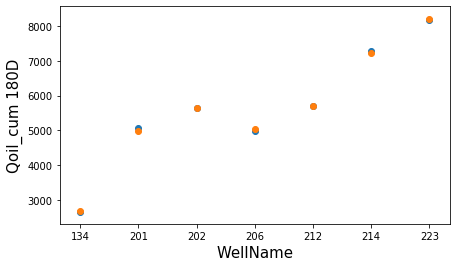

In [11]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson


PTPQcolumns1 = ['Общий объем закаченной жидкости ОГРП, м3', 
 'Тоннаж проппанта средний на стадию, т/стадия', 
 'Тоннаж проппанта, т', 
 'Средний расход жидкости ГРП, м3/мин', 
 'Количество кластеров*Количество стадий ГРП, шт', 
 'Доля проппанта на жидкости типа LG', 
 'Доля закачки в пласт пропанта 30/50 Fores', 
 'Доля проппанта на жидкости типа DX', 
 'work_days', 
 'Закачано жид-ти DX на ОГРП, доля', 
 'Закачано жид-ти LG на ОГРП, доля', 
 'Средняя мощность пачки, м', 
 'Отметки по ГС (MD), м ', 
 'FracN_fact', 
 'Коэффициент Пуассона', 
 'Закачано жид-ти SW на ОГРП, доля', 
 'Доля проппанта на жидкости типа SW', 
 'delta P', 
 'Рпл. после МГРП, ат.']


# PTPQcolumns1 =['Общий объем закаченной жидкости ОГРП, м3', 
#  'Тоннаж проппанта средний на стадию, т/стадия', 
#  'Доля закачки в пласт пропанта 30/50 Fores', 
#  'Закачано жид-ти DX на ОГРП, доля',
#                'Коэффициент Пуассона'] #ip 180


KKK = 'Qoil_cum 180D'
PTPQcolumns1 = ['Общий объем закаченной жидкости ОГРП, м3', 
 'Тоннаж проппанта средний на стадию, т/стадия',
               'Доля закачки в пласт пропанта 30/50 Fores',
                'Закачано жид-ти DX на ОГРП, доля',
                'Коэффициент Пуассона']

data = dataGood.copy()
dataForAnalysis = data.dropna(subset=[KKK, ])
yForAnalysis = dataForAnalysis.loc[:, KKK]
dataForAnalysis = dataForAnalysis.fillna(dataForAnalysis.mean())
xForAnalysis = dataForAnalysis.loc[:, PTPQcolumns1]
dataForAnalysis = dataForAnalysis.iloc[:,12:]
dataForAnalysis = dataForAnalysis[PTPQcolumns1]

print(PTPQcolumns1)

dataForVIF = dataForAnalysis.loc[:, PTPQcolumns1] 
X = add_constant(dataForVIF)

VIF = pd.Series([variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])], 
                      index=X.columns) 
regressor = sm.OLS(yForAnalysis, add_constant(xForAnalysis)).fit()
print('\n')
print(VIF)
print('\n')
print(regressor.params)
confIntervals = regressor.conf_int(alpha=0.9, cols=None)
print(confIntervals)
print('\n')

print(regressor.summary())

# print(regressor.summary())
# r2 = 0.832
# homoscedasticity_test(regressor)
# normality_of_residuals_test(regressor)
# print('Дарбин Уотсон:', durbin_watson(regressor.resid))
#print(regressor.predict(add_constant(xForAnalysis)))
#print(yForAnalysis)

filter_largeGood = df['Качество']==1
dataGood = df.loc[filter_largeGood].copy()

x1 = dataGood.loc[0:,'WellName']

y1 = yForAnalysis
y2 = regressor.predict(add_constant(xForAnalysis))


fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(x1, y1)
ax.scatter(x1, y2)

ax.set_xlabel('WellName', fontsize=15)
ax.set_ylabel(KKK, fontsize=15)

plt.show()

In [12]:
wantColumns1 = ['Общий объем закаченной жидкости ОГРП, м3',
 'Тоннаж проппанта средний на стадию, т/стадия',
'Доля закачки в пласт пропанта 30/50 Fores', 
'Закачано жид-ти DX на ОГРП, доля',
'Коэффициент Пуассона']

# leftConst = 15193.623804 #IP90 60%
# rightConst = 27914.942842 #IP90 60%

# leftConst = 16189.398246 #IP180 60%
# rightConst = 26919.168400 #IP180 60%
  
leftConst = confIntervals[0][0]
rightConst = confIntervals[1][0]


leftDx = 0
rightDx = 0.01
leftPuas = 0.29
rightPuas = 0.3

leftOGRP = 32805
rightOGRP = 49005
leftTon = 27
rightTon = 33
left3050 = 0.765
right3050 = 0.935

# 1350 +-135
# 30 +-3
# 150 +-15
# 0.85 +-0.085

k = 'normal'
#k = 'net'

seredinaConst  = (rightConst+leftConst)/2
otklonConst  =rightConst-(rightConst+leftConst)/2
seredinaDx  = (rightDx+leftDx)/2
otklonDx  =rightDx-(rightDx+leftDx)/2
seredinaPuas  = (rightPuas+leftPuas)/2
otklonPuas =rightPuas-(rightPuas+leftPuas)/2

seredinaOGRP  = (rightOGRP+leftOGRP)/2
otklonOGRP =rightOGRP-(rightOGRP+leftOGRP)/2
seredinaTon  = (rightTon+leftTon)/2
otklonTon =rightTon-(rightTon+leftTon)/2
seredina3050  = (right3050+left3050)/2
otklon3050 =right3050-(right3050+left3050)/2


N = 100000
rng = np.random.RandomState(0)
TestDataFrame = pd.DataFrame(columns=wantColumns1)


TestDataFrame['const'] = rng.uniform(leftConst,  rightConst, N) #IP 90 35%
TestDataFrame['Общий объем закаченной жидкости ОГРП, м3'] = np.ones(N)*40500 
TestDataFrame['Тоннаж проппанта средний на стадию, т/стадия'] = np.ones(N)*150 
TestDataFrame['Доля закачки в пласт пропанта 30/50 Fores'] = np.ones(N)*0.60
TestDataFrame['Закачано жид-ти DX на ОГРП, доля'] =  rng.uniform(leftDx, rightDx, N)
TestDataFrame['Коэффициент Пуассона'] = rng.uniform(leftPuas, rightPuas, N)

if k=='normal':
    TestDataFrame['const'] = rng.normal(seredinaConst,  otklonConst, N) #IP 90 35%
    TestDataFrame['Общий объем закаченной жидкости ОГРП, м3'] = np.ones(N)*40500 
    TestDataFrame['Тоннаж проппанта средний на стадию, т/стадия'] = np.ones(N)*150 
    TestDataFrame['Доля закачки в пласт пропанта 30/50 Fores'] = np.ones(N)*0.85
#    TestDataFrame['Общий объем закаченной жидкости ОГРП, м3'] = rng.normal(seredinaOGRP, otklonOGRP, N)
#     TestDataFrame['Тоннаж проппанта средний на стадию, т/стадия'] = rng.normal(seredinaTon, otklonTon, N)
#     TestDataFrame['Доля закачки в пласт пропанта 30/50 Fores'] = rng.normal(seredina3050, otklon3050, N)    
    TestDataFrame['Закачано жид-ти DX на ОГРП, доля'] =  rng.normal(seredinaDx, otklonDx, N)
    TestDataFrame['Коэффициент Пуассона'] = rng.normal(seredinaPuas, otklonPuas, N)
#     rng.normal(seredinaPuas, otklonPuas, N)

TestDataFrame['predict']=TestDataFrame['const']
for i in PTPQcolumns1:
    TestDataFrame['predict']=TestDataFrame['predict']+regressor.params[i]*TestDataFrame[i]
    print(i,regressor.params[i], TestDataFrame[i].mean(), TestDataFrame['predict'].mean())



Общий объем закаченной жидкости ОГРП, м3 0.03950745490281782 40500.0 8394.348334894046
Тоннаж проппанта средний на стадию, т/стадия 29.087956982926528 150.0 12757.541882332876
Доля закачки в пласт пропанта 30/50 Fores 10461.055106190011 0.8500000000005409 21649.43872259399
Закачано жид-ти DX на ОГРП, доля -466.4179676293934 0.005028322195690483 21647.093422775473
Коэффициент Пуассона -32281.81421649293 0.29502721135542304 12123.079796989648


In [13]:
#------------------
#для версии с 2 графиками, менять на 1 или 2 и перезапускать
#------------------
TestDataFrame_2 = pd.DataFrame(columns=wantColumns1)
TestDataFrame_2['const'] = rng.normal(seredinaConst,  otklonConst, N) #IP 90 35%
TestDataFrame_2['Общий объем закаченной жидкости ОГРП, м3'] = np.ones(N)*40500 
TestDataFrame_2['Тоннаж проппанта средний на стадию, т/стадия'] = np.ones(N)*150 
TestDataFrame_2['Доля закачки в пласт пропанта 30/50 Fores'] = np.ones(N)*0.85  
TestDataFrame_2['Закачано жид-ти DX на ОГРП, доля'] =  rng.normal(seredinaDx, otklonDx, N)
TestDataFrame_2['Коэффициент Пуассона'] = rng.normal(seredinaPuas, otklonPuas, N)
TestDataFrame_2['predict']=TestDataFrame_2['const']
for i in PTPQcolumns1:
    TestDataFrame_2['predict']=TestDataFrame_2['predict']+regressor.params[i]*TestDataFrame_2[i]

    

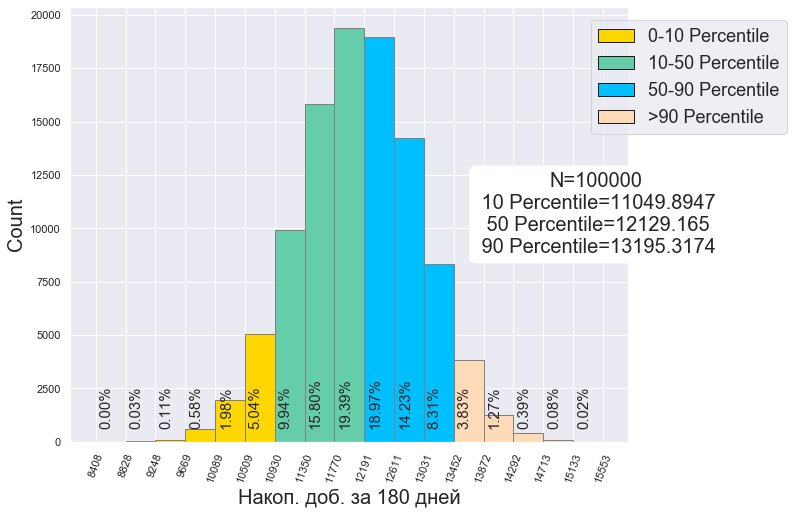

In [49]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
sns.set(font_scale=1)

data = TestDataFrame_2['predict'].copy()

twentyfifth, seventyfifth, ninetyfifth = np.percentile(data, [10, 50, 90])
TestDataFrame['predict'][TestDataFrame['predict']<0]=float('nan')
TestDataFrame.dropna(subset=['predict', ])


# Colours for different percentiles
perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(10,8))

'''
counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
bins    = numpy.ndarray of bin edge/range values
patches = a list of Patch objects.
        each Patch object contains a Rectnagle object. 
        e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
'''
counts, bins, patches = ax.hist(data, 
                                facecolor=perc_50_colour, 
                                edgecolor='gray', 
                                bins=1+math.trunc(math.log2(N)))


# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=70)

# Set the graph title and axes titles
#plt.title('Distribution of randomly generated numbers', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Накоп. доб. за 180 дней', fontsize=20)

# Change the colors of bars at the edges

for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,.2f}%".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor', fontsize=15)

    


#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, 
                                                         perc_50_colour, 
                                                         perc_75_colour, 
                                                         perc_95_colour]]
labels= ["0-10 Percentile",
         "10-50 Percentile", 
         "50-90 Percentile", 
         ">90 Percentile"]


# Annotation for bar values
ax.annotate('N='+str(N)
            +'\n 10 Percentile='+str(round(twentyfifth,4))
            +'\n 50 Percentile='+str(round(seventyfifth,4))
            +'\n 90 Percentile='+str(round(ninetyfifth,4)),
            xy=(.75,.50), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=20, bbox=dict(boxstyle="round", fc="white"),
            rotation=0)
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99), fontsize=18)

# Display the graph
plt.show()

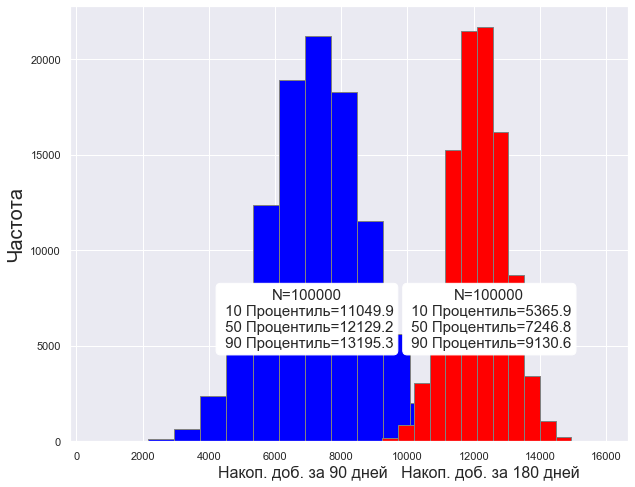

In [18]:
#------------------
#для версии с 2 графиками
#------------------
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
sns.set(font_scale=1)

data_1 = TestDataFrame_1['predict'].copy()
data_2 = TestDataFrame_2['predict'].copy()
#1
twentyfifth_1, seventyfifth_1, ninetyfifth_1 = np.percentile(data_1, [10, 50, 90])
TestDataFrame_1['predict'][TestDataFrame_1['predict']<0]=float('nan')
TestDataFrame_1.dropna(subset=['predict', ])
#2
twentyfifth_2, seventyfifth_2, ninetyfifth_2 = np.percentile(data_2, [10, 50, 90])
TestDataFrame_2['predict'][TestDataFrame_2['predict']<0]=float('nan')
TestDataFrame_2.dropna(subset=['predict', ])

# Colours for different percentiles
perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(10,8))

'''
counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
bins    = numpy.ndarray of bin edge/range values
patches = a list of Patch objects.
        each Patch object contains a Rectnagle object. 
        e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
'''
#1
counts_1, bins_1, patches_1 = ax.hist(data_1, 
                                facecolor='blue', 
                                edgecolor='gray', 
                                bins=1+math.trunc(math.log2(N)))
#2
counts_2, bins_2, patches_2 = ax.hist(data_2, 
                                facecolor='red', 
                                edgecolor='gray', 
                                bins=1+math.trunc(math.log2(N)))

# Set the graph title and axes titles
plt.ylabel('Частота', fontsize=20)
plt.xlabel('                      Накоп. доб. за 90 дней   Накоп. доб. за 180 дней', fontsize=16)
#-------------------------------------------------------------------------------------------

# Display the the count of data points and % for each bar in histogram
#for i in range(len(bins)-1):
#    bin_label = "{0:,.2f}%".format((counts[i]/counts.sum())*100)
#    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor', fontsize=15)

 # Annotation for bar values
ax.annotate('N='+str(N)
            +'\n 10 Процентиль='+str(round(5365.9,1))
            +'\n 50 Процентиль='+str(round(7246.8,1))
            +'\n 90 Процентиль='+str(round(9130.6,1)),
            xy=(.77,.28), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=15, bbox=dict(boxstyle="round", fc="white"),
            rotation=0)   

# Annotation for bar values
ax.annotate('N='+str(N)
            +'\n 10 Процентиль='+str(round(11049.9,1))
            +'\n 50 Процентиль='+str(round(12129.2,1))
            +'\n 90 Процентиль='+str(round(13195.3,1)),
            xy=(.483,.28), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=15, bbox=dict(boxstyle="round", fc="white"),
            rotation=0)

if 0==1:
    ax.annotate('N='+str(N)
                +'\n 10 Percentile='+str(round(twentyfifth_2,1))
                +'\n 50 Percentile='+str(round(seventyfifth_2,1))
                +'\n 90 Percentile='+str(round(ninetyfifth_2,1)),
                xy=(.77,.28), xycoords='figure fraction',
                horizontalalignment='center', verticalalignment='bottom',
                fontsize=15, bbox=dict(boxstyle="round", fc="white"),
                rotation=0)   

    # Annotation for bar values
    ax.annotate('N='+str(N)
                +'\n 10 Percentile='+str(round(twentyfifth_1,1))
                +'\n 50 Percentile='+str(round(seventyfifth_1,1))
                +'\n 90 Percentile='+str(round(ninetyfifth_1,1)),
                xy=(.483,.28), xycoords='figure fraction',
                horizontalalignment='center', verticalalignment='bottom',
                fontsize=15, bbox=dict(boxstyle="round", fc="white"),
                rotation=0)
#plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99), fontsize=18)

# Display the graph
plt.show()

In [43]:
fig.savefig('Рисунок5.svg', format='svg', dpi=1200, bbox_inches="tight")

In [39]:
np.percentile(TestDataFrame_1['predict'], [10, 50, 90])

array([5365.94097855, 7246.80142295, 9130.61577373])

In [33]:
data

0        14481.851606
1        11138.787385
2        11735.290880
3        12848.231780
4        13017.763802
             ...     
99995    11759.914076
99996    11613.430029
99997    11663.043508
99998    12378.238083
99999    12339.421014
Name: predict, Length: 100000, dtype: float64

0.0
1817.9736787763904
1817.9736787763904


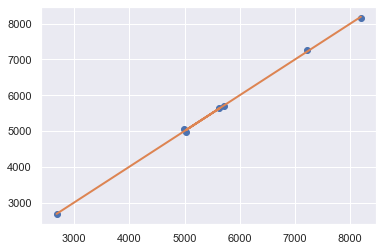

In [50]:
# regressor.get_influence()
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(regressor)
st, dt, ss2 = summary_table(regressor, alpha=0.5)

fittedvalues = dt[:, 2]
predict_mean_se  = dt[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = dt[:, 4:6].T
predict_ci_low, predict_ci_upp = dt[:, 6:8].T

# Check we got the right things
print(np.max(np.abs(regressor.fittedvalues - fittedvalues)))
print(np.max(np.abs(iv_l - predict_ci_low)))
print(np.max(np.abs(iv_u - predict_ci_upp)))

x = regressor.predict()

# np.sort(data)

plt.plot(x, yForAnalysis.to_numpy(), 'o')
plt.plot(x, fittedvalues, '-', lw=2)
# plt.plot(x, predict_ci_low, 'r--', lw=2)
# plt.plot(x, predict_ci_upp, 'r--', lw=2)
# plt.plot(x, predict_mean_ci_low, 'r--', lw=2)
# plt.plot(x, predict_mean_ci_upp, 'r--', lw=2)
plt.show()

In [ ]:
wantColumns1 = ['Общий объем закаченной жидкости ОГРП, м3',
 'Тоннаж проппанта средний на стадию, т/стадия',
'Доля закачки в пласт пропанта 30/50 Fores', 
'Закачано жид-ти DX на ОГРП, доля',
'Коэффициент Пуассона',
'Отметки по ГС (MD), м ']

import pymc3 as pm
def SamplerMCMC(leftBound, rightBound, data, N):
    seredina = (rightBound+leftBound)/2
    otklon =rightBound-(rightBound+leftBound)/2
    with pm.Model():
        mu = pm.Normal('mu', seredina, 0.2*seredina)
        returns = pm.Normal('returns', mu=seredina, sd=otklon, observed=np.sort(data))  
        step = pm.Metropolis()
        trace = pm.sample(N, step)
    return(trace[:]['mu']) 

N = 100000
rng = np.random.RandomState(0)
TestDataFrame = pd.DataFrame(columns=wantColumns1)
# TestDataFrame['const'] = rng.uniform(1614.2920, 11975.3129, N)  #IP 180
TestDataFrame['const'] = rng.uniform(-3077.5648, 3128.6690, N) #IP 90

print('Общий объем закаченной жидкости ОГРП, м3')
data = dataGood['Общий объем закаченной жидкости ОГРП, м3'].to_numpy()
leftBound = 26400
rightBound = 40500
asas = SamplerMCMC(leftBound, rightBound, data, N)
TestDataFrame['Общий объем закаченной жидкости ОГРП, м3'] = pd.Series(asas[3*N:])


data = dataGood['Тоннаж проппанта средний на стадию, т/стадия'].to_numpy()
leftBound = 120
rightBound = 170
asas = SamplerMCMC(leftBound, rightBound, data, N)
TestDataFrame['Тоннаж проппанта средний на стадию, т/стадия'] =  pd.Series(asas[3*N:])

data = dataGood['Доля закачки в пласт пропанта 30/50 Fores'].to_numpy()
leftBound = 0.288477
rightBound =  0.609378
asas = SamplerMCMC(leftBound, rightBound, data, N)
TestDataFrame['Доля закачки в пласт пропанта 30/50 Fores'] = pd.Series(asas[3*N:])

data = dataGood['Закачано жид-ти DX на ОГРП, доля'].to_numpy()
leftBound = 0
rightBound = 0.1
asas = SamplerMCMC(leftBound, rightBound, data, N)
TestDataFrame['Закачано жид-ти DX на ОГРП, доля'] =  pd.Series(asas[3*N:])

data = dataGood['Коэффициент Пуассона'].to_numpy()
leftBound = 26400
rightBound = 40500
asas = SamplerMCMC(leftBound, rightBound, data, N)
TestDataFrame['Коэффициент Пуассона'] =  pd.Series(asas[3*N:])

data = dataGood['Отметки по ГС (MD), м '].to_numpy()
leftBound = 2262.4
rightBound = 3336.27
asas = SamplerMCMC(leftBound, rightBound, data, N)
TestDataFrame['Отметки по ГС (MD), м '] =  pd.Series(asas[3*N:])


TestDataFrame['predict']=TestDataFrame['const']
for i in PTPQcolumns1:
    TestDataFrame['predict']=TestDataFrame['predict']+regressor.params[i]*TestDataFrame[i]

TestDataFrame

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# Generate random data
data = TestDataFrame['predict']

# Colours for different percentiles
perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(8,8))

'''
counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
bins    = numpy.ndarray of bin edge/range values
patches = a list of Patch objects.
        each Patch object contains a Rectnagle object. 
        e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
'''
counts, bins, patches = ax.hist(data, 
                                facecolor=perc_50_colour, 
                                edgecolor='gray', 
                                bins=1+math.trunc(math.log2(N)))


# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=70)

# Set the graph title and axes titles
#plt.title('Distribution of randomly generated numbers', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel(KKK, fontsize=15)

# Change the colors of bars at the edges
twentyfifth, seventyfifth, ninetyfifth = np.percentile(data, [10, 50, 90])
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,.2f}%".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

    


#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, 
                                                         perc_50_colour, 
                                                         perc_75_colour, 
                                                         perc_95_colour]]
labels= ["0-10 Percentile",
         "10-50 Percentile", 
         "50-90 Percentile", 
         ">90 Percentile"]


# Annotation for bar values
ax.annotate('N='+str(N)
            +'\n 10 Percentile='+str(round(twentyfifth,4))
            +'\n 50 Percentile='+str(round(seventyfifth,4))
            +'\n 90 Percentile='+str(round(ninetyfifth,4)),
            xy=(.85,.30), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=10, bbox=dict(boxstyle="round", fc="white"),
            rotation=0)
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

# Display the graph
plt.show()

In [ ]:
sns.distplot(trace[:]['mu'], label='PyMC3 sampler');

In [ ]:
ReglarRegressor = sm.OLS(yForAnalysis, add_constant(xForAnalysis)).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=1.0,refit=True)
ReglarRegressor.summary()
#sm.OLS(yForAnalysis, add_constant(xForAnalysis)).RegularizedResults(method='elastic_net', alpha=0.0, L1_wt=1.0)

In [ ]:
ax1 = plt.hist(regressor.resid)
plt.xlim(-200,200)
plt.xlabel('Residuals')
plt.show()

In [ ]:
j=0

for i in PTPQcolumns1:

    j = j+1
    x1 = data.loc[1:, KKK]
    x1 = x1.values

    y1 = data.loc[1:, i]
    y1 = y1.values

    fig, ax = plt.subplots(figsize=(7,4))
    ax.scatter(x1, y1)

    ax.set_xlabel(KKK, fontsize=15)
    ax.set_ylabel(i, fontsize=15)

    plt.show()
    
    if j==3:
        break

In [ ]:
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson



def regression_results(y_true, y_pred, VolumeSample, Nobservations):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    r2adj = 1-(1-r2)*(VolumeSample-1)/(VolumeSample-Nobservations-1)

    print('r2: ', round(r2,4))
    print('r2adj: ', round(r2,4))
    print('Hetero (): ', round(r2,4))
    print('r2adj: ', round(r2,4))
    print('r2adj: ', round(r2,4))
    
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')
    
    
from scipy import stats    
def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    


In [ ]:
#КЛАСТЕРИЗАЦИЯ
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

df = MyDataUpload.main(test)[1]
data = df.copy()


wantColumns = ['Qoil_cum 30D/FracN_fact',
               'Qoil_cum 30D',
               'Qoil_cum 60D/FracN_fact',
               'Qoil_cum 60D', 
               'Qoil_cum 90D/FracN_fact {21}',  
               'Qoil_cum 90D', 
               'Qoil_cum 180D/FracN_fact', 
               'Qoil_cum 180D', 
               'Qoil_cum 360D/FracN_fact',
               'Qoil_cum 360D',
               'WellName']


wantColumns[1] = ['Qoil_cum 30D/FracN_fact',
               'Qoil_cum 30D',
               'WellName']


wantColumns[2] = ['Qoil_cum 60D/FracN_fact',
               'Qoil_cum 60D',
               'WellName']


wantColumns[3] = ['Qoil_cum 90D/FracN_fact',  
               'Qoil_cum 90D', 
               'WellName']

wantColumns[4] = ['Qoil_cum 180D/FracN_fact', 
               'Qoil_cum 180D',
               'WellName']

wantColumns[5] = ['Qoil_cum 360D/FracN_fact',
               'Qoil_cum 360D',
               'WellName']

silhouette0 = []
for i in range(1, 6):
    KlasterData = data.loc[0:, wantColumns[i]]
    KlasterData = KlasterData.dropna(subset=wantColumns[i])

    # Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
    varieties = list(KlasterData.pop('WellName'))

    scaler = MinMaxScaler()
    scaler.fit(KlasterData)
    NormKlasterData =pd.DataFrame(scaler.transform(KlasterData), columns = KlasterData.columns)
    #display(NormKlasterData)


    # Извлекаем измерения как массив NumPy
    samples = NormKlasterData.values


    # # Реализация иерархической кластеризации при помощи функции linkage
    mergings = linkage(samples, method='average', metric = 'euclidean')

    #single , complete и average 

    nodes = fcluster(mergings, 2, criterion="maxclust")
    silhouette0.append(float(silhouette_score(samples , nodes, metric='euclidean')))  

    # Строим дендрограмму, указав параметры удобные для отображения
    fig, ax = plt.subplots(figsize=(12,5)) 
    dendrogram(mergings,
               labels=varieties,
               leaf_rotation=90,
               leaf_font_size=15,
               ax=ax)

    plt.show()

    print(silhouette0)
    
(silhouette0[0]+silhouette0[1]+silhouette0[2]+silhouette0[3]+silhouette0[4])/5

In [ ]:
def ssdev(xs):
    '''Сумма квадратов отклонений между 
       каждым элементом и средним по выборке'''
    x_hat = xs.mean() 
    square_deviation = lambda x : (x - x_hat) ** 2 
    return sum( map(square_deviation, xs) ) 

def f_test(groups):
    '''Проверка на основе F-теста'''
    m, n = len(groups), sum(groups.count())
    df1, df2 = m - 1, n - m 
    ssw = sum( groups.apply(lambda g: ssdev(g)) )  # внутригрупповая сумма квадратов отклонений
    sst = ssdev( df['dwell-time'] )                # полная сумма квадратов по всему набору
    ssb = sst - ssw                                # межгрупповая сумма квадратов отклонений
    msb = ssb / df1                                # усредненная межгрупповая
    msw = ssw / df2                                # усредненная внутригрупповая
    f_stat = msb / msw
    return stats.f.sf(f_stat, df1, df2)            # функция выживания (иногда точнее, чем 1-cdf )

In [ ]:
data

In [ ]:
df = MyDataUpload.main(test)[1]
data = df.copy()

filter_largeGood = data['Качество']==1
dataGood = data.loc[filter_largeGood].copy()


filter_largeBad = data['Качество']==2
dataBad = data.loc[filter_largeBad].copy()

Analysis = pd.DataFrame(data.loc[:, data.dtypes == float].columns)

print('\n -----------------------\n Матожидание хороших \n -----------------------')
print(dataGood.mean())
Analysis['Матожидание хороших'] = dataGood.mean(axis=1)

print('\n -----------------------\n Матожидание плохих \n -----------------------')
print(dataBad.mean())

print('\n -----------------------\n Дисперсия хороших \n -----------------------')
print(dataGood.mean())

print('\n -----------------------\n Дисперсия плохих \n -----------------------')
print(dataBad.mean())

#выборочная дисперсия
print('\n -----------------------\nМежгрупповая дисперсия \n -----------------------')
helpl = {}
for i in data.loc[:, data.dtypes == float].columns:
    print(i, (dataBad[i].std()*15+dataGood[i].std()*7)/22)
    helpl[i] = (dataBad[i].std()*15+dataGood[i].std()*7)/22

print('\n -----------------------\n Общая дисперсия \n -----------------------')
print(dataBad.mean())




In [ ]:

#a1 = pd.DataFrame.from_dict(helpl, orient='index')
a1 = pd.DataFrame(helpl)
# a1
a1.to_excel("output.xlsx") 

F, p = stats.f_oneway(df['set1'], df['set2'], df['set3'])
print(F, p)

In [ ]:
data.columns


In [ ]:




# Iwant = ['Минимальное расстояние до разлома',
#          'Количество кластеров*Количество стадий ГРП, шт',
#          'Тоннаж проппанта, т',
#          'Тоннаж проппанта средний на стадию, т/стадия',
#          'Доля закачки в пласт пропанта 30/50 Fores',
#          'Доля проппанта на жидкости типа SW',
#          'Доля проппанта на жидкости типа LG',
#          'Закачано жид-ти SW на ОГРП, доля',
#          'Закачано жид-ти LG на ОГРП, доля',
#          'Общий объем закаченной жидкости ОГРП, м3',
#          'delta P']  

IwantTarget ='delta P'
Iwant = ['Минимальное расстояние до разлома',
         'Количество кластеров*Количество стадий ГРП, шт',
         'Тоннаж проппанта, т',
         'Тоннаж проппанта средний на стадию, т/стадия',
         'Доля закачки в пласт пропанта 30/50 Fores',
         'Доля проппанта на жидкости типа SW',
         'Доля проппанта на жидкости типа LG',
         'Закачано жид-ти SW на ОГРП, доля',
         'Закачано жид-ти LG на ОГРП, доля',
         'Общий объем закаченной жидкости ОГРП, м3',
         'delta P', 'FracN_fact', 'Тоннаж проппанта средний на стадию, т/стадия']  








for i in Iwant:
    x1 = data.loc[1:, i]
    x1 = x1.values

    y1 = data.loc[1:, i]
    y1 = y1.values

    z1 = data.loc[1:, 'Qoil_cum 60D']+1
    z1 = z1.values

    n1 = data.loc[1:, 'WellName']
    n1 = n1.values

    colors1 = data.loc[1:, 'Качество']
    #colors1 = colors1.values-1
    #colors1 = [10, 5, 5,10, 5, 5,10, 5, 5,10, 5, 5,10, 5, 5,10, 5, 5,10, 5, 5]
    #colors1 = np.random.rand(21) 

    #sns.set(font_scale=1.7)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(x1, y1, s=z1/10, c=colors1)
    
    ax.set_xlabel(i, fontsize=13)
    ax.set_ylabel(i, fontsize=13)

    for i, txt in enumerate(n1):
        ax.annotate(txt, (x1[i], y1[i]))

    plt.show()

In [ ]:
#data['Klasters']=data['Количество кластеров*Количество стадий ГРП, шт']/data['FracN_fact']

x1 = data.loc[1:, 'Количество кластеров*Количество стадий ГРП, шт']
x1 = x1.values

y1 = data.loc[1:, 'Количество кластеров*Количество стадий ГРП, шт']
y1 = y1.values

z1 = data.loc[1:, 'Qoil_cum 60D']+1
z1 = z1.values

n1 = data.loc[1:, 'WellName']
n1 = n1.values

colors1 = data.loc[1:, 'Качество']




fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x1, y1, s=z1/10, c=colors1)
    
ax.set_xlabel(i, fontsize=13)
ax.set_ylabel(i, fontsize=13)

for i, txt in enumerate(n1):
    ax.annotate(txt, (x1[i], y1[i]))

plt.show()

In [ ]:
data[['WellName', 'Качество',
'Минимальное расстояние до разлома', 
 'Количество кластеров*Количество стадий ГРП, шт',
 'Тоннаж проппанта, т', 
 'Доля закачки в пласт пропанта 30/50 Fores',
 'Доля проппанта на жидкости типа SW',
 'Закачано жид-ти SW на ОГРП, доля', 
 'Общий объем закаченной жидкости ОГРП, м3',
 'delta P']]



In [ ]:
data.columns

In [ ]:
#дискриминант АНАЛИЗ
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss


# Создание объекта алгоритма линейного дискриминантного анализа
clf = LinearDiscriminantAnalysis()

# Iwant = ['Минимальное расстояние до разлома', 
#  'Количество кластеров*Количество стадий ГРП, шт',
#  'Тоннаж проппанта, т', 
#  'Доля закачки в пласт пропанта 30/50 Fores',
#  'Доля проппанта на жидкости типа SW',
#  'Закачано жид-ти SW на ОГРП, доля', 
#  'Общий объем закаченной жидкости ОГРП, м3',
#  'delta P']

Iwant = [
 'Количество кластеров*Количество стадий ГРП, шт',
 'Тоннаж проппанта, т', 
 'Доля закачки в пласт пропанта 30/50 Fores',
 
 'Общий объем закаченной жидкости ОГРП, м3',
 'delta P', 'FracN_fact', 'Тоннаж проппанта средний на стадию, т/стадия']

#'FracN_fact', 'Тоннаж проппанта средний на стадию, т/стадия'

# Тренировка модели линейного дискриминантного анализа
y = data[['Качество']]-1

X = data[Iwant].fillna(data[Iwant].mean())

train_X, test_X, train_y, test_y = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2, 
                                                        random_state=0)


a = clf.fit(X, y)



print(a.coef_)
a.intercept_



print(accuracy_score(test_y, a.predict(test_X)))
print(log_loss(test_y, a.predict(test_X),normalize=True))



print(accuracy_score(y, a.predict(X)))
print(log_loss(y, a.predict(X)))

In [ ]:
data.columns

In [ ]:

#display(y)
f=y
f=f.join(pd.DataFrame(a.predict_proba(X), columns=['0 ("хорошие")', '1 ("плохие")']))
f.to_excel("output1.xlsx")



In [ ]:
from sklearn.metrics import plot_confusion_matrix, auc, roc_curve

fpr, tpr, thresholds = roc_curve(y, a.predict(X))
print(auc(fpr, tpr))
plot_confusion_matrix(a, X, y,cmap=plt.cm.Blues)

In [ ]:
print(a.predict(X_train))
print(y_train)

In [ ]:
def AllDiagrams(NameOf, CorrLimit):
    for i in range(0, 100):
        regressor = sm.OLS(Y, x).fit()       
        maxVar = max(regressor.pvalues)
        print(maxVar)
        if maxVar > sl:
            for j in Columns:
                if regressor.pvalues[j] == maxVar:
                    x = x.drop(columns=[j])
                    Columns.remove(j)
    display(regressor.pvalues)            
    #display(x)
    return(Columns)

In [ ]:

#selected_columns




#ПРС, Qн старт (т/сут)
Qcolumns = ['ПП, ТСП1.1',
            'ПП, Пачка IV ТСП1',
            'ПП, ТСП1',
            'ПП, Пачка I ТСП1',
            'ПП, Пачка III ТСП1'
            'ПРС, Коэффициент экспоненты a',
            'ПГ, Nср на стадию, т',
            'ХС, Стадия технологического эксперимента',
            'Нормир. На колво стадий, ПРС, Qн старт (т/сут)',
            'ПГ, Общий объем жидкости закаченной вместе в проппантом, м3',
            'ПГ, Nобщ, т']

#ПРС, Qн стартовый (ПТП) т/сут
PTPQcolumns = ['ПП, Пачка IV ТСП1',
               'ПГ, Nср на стадию, т',
               'ПП, ТСП1_2',
               'ХС, Стадия технологического эксперимента',
               'ПП, Пачка I ТСП1',
               'ПП, ТСП1',
               'ПГ, Nобщ, т',
               'ПГ, Общий объем жидкости закаченной вместе в проппантом, м3',
               'ПП, Пачка III ТСП1']

#ПРС, IP180 факт
IP180columns = ['ПП, Пачка IV ТСП1', 
                'ПП, Пачка I ТСП1',
                'ПП, ТСП1',
                'ПП, ТСП1_2',
                'ПП, Пачка III ТСП1',
                'ХС, Стадия технологического эксперимента']




In [ ]:
#предподготовка
SL = 0.05

dataForAnalysis = df.dropna(subset=['ПРС, IP180 факт', ])
yForAnalysis = dataForAnalysis.loc[:, 'ПРС, IP180 факт']
dataForAnalysis = dataForAnalysis.fillna(dataForAnalysis.mean())
xForAnalysis = dataForAnalysis.loc[:, IP180columns]
dataForAnalysis = dataForAnalysis.iloc[:,11:]
dataForAnalysis = dataForAnalysis[IP180columns]
# #--------

# dataForAnalysis = df.dropna(subset=['ПРС, Qн стартовый (ПТП) т/сут', ])
# yForAnalysis = dataForAnalysis.loc[:, 'ПРС, Qн стартовый (ПТП) т/сут']
# dataForAnalysis = dataForAnalysis.fillna(dataForAnalysis.mean())
# xForAnalysis = dataForAnalysis.loc[:, PTPQcolumns]
# dataForAnalysis = dataForAnalysis.iloc[:,11:]
# dataForAnalysis = dataForAnalysis[PTPQcolumns]
# --------

# dataForAnalysis = df.dropna(subset=['ПРС, Qн старт (т/сут)', ])
# yForAnalysis = dataForAnalysis.loc[:, 'ПРС, Qн старт (т/сут)']
# dataForAnalysis = dataForAnalysis.fillna(dataForAnalysis.mean())
# xForAnalysis = dataForAnalysis.loc[:, Qcolumns]
# dataForAnalysis = dataForAnalysis.iloc[:,11:]
# dataForAnalysis = dataForAnalysis[Qcolumns]






In [ ]:
def SearchingP(x, Y, sl, Columns):
    for i in range(0, 100):
        regressor = sm.OLS(Y, x).fit()       
        maxVar = max(regressor.pvalues)
        print(maxVar)
        if maxVar > sl:
            for j in Columns:
                if regressor.pvalues[j] == maxVar:
                    x = x.drop(columns=[j])
                    Columns.remove(j)
    display(regressor.pvalues)            
    #display(x)
    return(Columns)
            

        


In [ ]:
PTPQcolumns1 = ['ПГ, Nобщ, т',
               'ПГ, Общий объем жидкости закаченной вместе в проппантом, м3',
               'ПП, Пачка III ТСП1']


dataForAnalysis = df.dropna(subset=['ПРС, Qн стартовый (ПТП) т/сут', ])
yForAnalysis = dataForAnalysis.loc[:, 'ПРС, Qн стартовый (ПТП) т/сут']
dataForAnalysis = dataForAnalysis.fillna(dataForAnalysis.mean())
xForAnalysis = dataForAnalysis.loc[:, PTPQcolumns1]
dataForAnalysis = dataForAnalysis.iloc[:,11:]
dataForAnalysis = dataForAnalysis[PTPQcolumns1]



regressor = sm.OLS(yForAnalysis, xForAnalysis).fit()
regressor.pvalues

In [ ]:
SearchingP(xForAnalysis, yForAnalysis, SL, PTPQcolumns)

In [ ]:
PTPQcolumns

In [ ]:
import statsmodels.api as sm
def SearchingP(x, Y, sl, columns):
    numVars = len(x)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in PTPQcolumns:
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
                    x = x.drop(j)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SearchingP(xForAnalysis, yForAnalysis, SL, IP180columns)

In [ ]:
SearchingP(xForAnalysis, yForAnalysis, SL, IP180columns)

In [ ]:
import statsmodels.api as sm

def backwardElimination(x, Y, sl, columns):
    numVars = len(x)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [ ]:
#запуск
    

data_modeled, selected_columns = backwardElimination(xForAnalysis, yForAnalysis, SL, IP180columns)

In [ ]:

data.loc[:, IP180columns]

In [ ]:
#---------------------------------------
#--------------------------Interface elements-------
#---------------------------------------
#----------------------------------------------------------------------------------------
#Modeling tab--------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------

df = pd.DataFrame()
#Slider for choosing volume of test sample in the prediction tab
SliderVolumeTrain_ModelingTab = widgets.IntSlider(value=20)
SliderAndText_ModelingTab = widgets.HBox([widgets.Label('Объем тестовой выборки, %:'), 
                                      SliderVolumeTrain_ModelingTab])




#----------------------------------------------------------------------------------------
#Select model accordion--------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------
#Combobox for choosing depended variable of modeling
DependVariable_ModelingTab =  widgets.Dropdown(
    options=list(df.columns),
    description='Зависимая переменная:',
    style={'description_width': 'initial'}
)


#Box for choosing independed variable of modeling
IndependVariable_ModelingTab = widgets.SelectMultiple(
    options=list(df.columns),
    disabled=False,
    style={'description_width': 'initial'}
)
IndependVariableAndText_ModelingTab = widgets.HBox([widgets.Label('Независимые переменные:'), 
                                     IndependVariable_ModelingTab])


#Combobox for choosing method of modeling
# ComboboxMethods_ModelingTab =  widgets.Dropdown(
#     options=['МНК', 'Ridge регрессия', 'LASSO регрессия', 'Random Forest'],
#     description='Метод:'
# )

ComboboxMethods_ModelingTab =  widgets.Dropdown(
    options=modelsNames,
    description='Метод:'
)


#Checkbox for choosing method of modeling
CheckRefillMode_ModelingTab = widgets.Checkbox(
    value=False,
    description='Режим дозаполнения',
    disabled=False,
    indent=False
)


#Button of data frame upload
ButtonSelectModel_ModelingTab = widgets.Button(
    description='Сохранить выбор'
)


#Box in the prediction tab
BoxSelectModelAccordion_ModelingTab = widgets.VBox(
    children=(CheckRefillMode_ModelingTab,
              DependVariable_ModelingTab,
              IndependVariableAndText_ModelingTab,
              ComboboxMethods_ModelingTab,
              ButtonSelectModel_ModelingTab
             )
)


#----------------------------------------------------------------------------------------
#Assessment model accordion--------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------
#Build model accordion--------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------



#Combobox for choosing method of modeling
ComboboxFillNan_ModelingTab =  widgets.Dropdown(
    options=['Удалить', 
             'Среднее арифметическое', 
             'Медиана', 
             'Максимум', 
             'Минимум']
)   
ComboboxFillNanAndText_ModelingTab = widgets.HBox([widgets.Label('Пустые числовые ячейки:'), 
                                     ComboboxFillNan_ModelingTab])


#Button of model building
ButtonBuildModel_ModelingTab = widgets.Button(
    description='Построить модель'
)


#Box in the prediction tab
BoxParametersAccordion_ModelingTab = widgets.VBox(
    children=(SliderAndText_ModelingTab,
              ComboboxFillNanAndText_ModelingTab,              
              ButtonBuildModel_ModelingTab
             )
)


QualityMetrics_ModelingTab = widgets.SelectMultiple(
    options=['Коэффициент детерминации'],
    disabled=False,
    style={'description_width': 'initial'}
)


QualityMetricsAndText_ModelingTab = widgets.HBox([widgets.Label('Метрики качества:'), 
                                     QualityMetrics_ModelingTab])
#Button of data frame upload
ButtonMetrics_ModelingTab = widgets.Button(
    description='Вывод метрик'
)


BoxMetrics_ModelingTab = widgets.VBox(
    children=(QualityMetricsAndText_ModelingTab,
              ButtonMetrics_ModelingTab
             )
)

#----------------------------------------------------------------------------------------
#Correlation accordion--------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------

#Combobox for choosing method of modeling
ComboboxCorrMethods_ModelingTab =  widgets.Dropdown(
    options=['Пирсона', 'Спирмена', 'Кенделла'],
    description='Метод:'
)

ButtonCorrelation_ModelingTab = widgets.Button(
    description='Корреляционная матрица',
    style={'description_width': 'initial'}
)

BoxCorrelation_ModelingTab = widgets.VBox(
    children=(ComboboxCorrMethods_ModelingTab, 
              ButtonCorrelation_ModelingTab)
)
   
Accordion_ModelingTab = widgets.Accordion(children=[BoxCorrelation_ModelingTab,
                                                    BoxSelectModelAccordion_ModelingTab,
                                                    BoxParametersAccordion_ModelingTab, 
                                                    BoxMetrics_ModelingTab])

Accordion_ModelingTab.set_title(0, 'Корреляционный анализ')
Accordion_ModelingTab.set_title(1, 'Выбор переменных и модели')
Accordion_ModelingTab.set_title(2, 'Параметры модели')
Accordion_ModelingTab.set_title(3, 'Метрики качества')


df = MyDataUpload.main(test)[1]
IndependVariable_ModelingTab.options = list(df.columns)
DependVariable_ModelingTab.options = list(df.columns)




In [ ]:
PLOT_LABEL_FONT_SIZE = 14 

def ShortCheck_Click(b, out=widgets.Output()):
    df_CC = df.copy()

    models = []
    models.append(('LR', LinearRegression()))
    models.append(('R', Ridge()))
    models.append(('L', Lasso()))
    models.append(('ELN', ElasticNet()))
    models.append(('LARS', LarsCV()))
    models.append(('BR', BayesianRidge(n_iter=n_iter)))
    models.append(('KNR', KNeighborsRegressor()))
    models.append(('DTR', DecisionTreeRegressor()))
    models.append(('LSVR', LinearSVR()))
    models.append(('SVR', SVR()))
    models.append(('ABR', AdaBoostRegressor(n_estimators=n_estimators)))
    models.append(('BR', BaggingRegressor(n_estimators=n_estimators)))
    models.append(('ETR', ExtraTreesRegressor(n_estimators=n_estimators)))
    models.append(('GBR', GradientBoostingRegressor(n_estimators=n_estimators)))
    models.append(('RFR', RandomForestRegressor(n_estimators=n_estimators)))    

    
    # Оценивание эффективности выполнения каждого алгоритма
    scores = []
    names = []
    results = []
    predictions = []
    msg_row = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        names.append(name)
        results.append(cv_results)
        m_fit = model.fit(X_train, Y_train)
        m_predict = model.predict(X_test)
        predictions.append(m_predict)
        m_score = model.score(X_test, Y_test)
        scores.append(m_score)
        msg = "%s: train = %.3f (%.3f) / test = %.3f" % (name, cv_results.mean(), cv_results.std(), m_score)
        msg_row.append(msg)
        with out:
            print(msg)
    # Диаграмма размаха («ящик с усами»)
#     fig = pyplot.figure()
#     fig.suptitle('Сравнение результатов выполнения алгоритмов')
#     ax = fig.add_subplot(111)
#     red_square = dict(markerfacecolor='r', marker='s')
#     pyplot.boxplot(results, flierprops=red_square)
#     ax.set_xticklabels(names, rotation=45)
#     pyplot.show()    
    
    
    

def Correlation_Click(b, out=widgets.Output()):
    MethodRu_CC = ComboboxCorrMethods_ModelingTab.value
    if MethodRu_CC=='Пирсона':      
        Method_CC = 'pearson'            
    if MethodRu_CC=='Спирмена':
        Method_CC = 'spearman'
    if MethodRu_CC=='Кенделла':
        Method_CC =  'kendall'       
    df_CC = df.copy()
    dfNames_CC = dict()
    for i in range(0, len(list(df))):
        dfNames_CC[list(df)[i]] = str(i)    

    df_CC = df_CC.rename(columns=dfNames_CC)

    fig, ax = plt.subplots(figsize=(20,20)) 
    CorMatrix_CC = sns.heatmap(df_CC.corr(method=Method_CC),
                               cbar=True,
                               annot=True, 
                               cmap="PiYG",
                               ax=ax)        
    with out:
        print('Корреляционная матрица, метод: '+MethodRu_CC+'\n')
        display(CorMatrix_CC)        

        
def Modeling_Click(b, out=widgets.Output()):
    global determinCoef, Xs, models
    Method_MC = ComboboxMethods_ModelingTab.value
    VolumeTest_MC = SliderVolumeTrain_ModelingTab.value/100 
    MethodFillNan_MC = ComboboxFillNan_ModelingTab.value
    df_MC = df.copy()
    y_MC = df_MC[DependVariable_ModelingTab.value].values.reshape(-1,1)
    Xs_MC = df_MC[list(IndependVariable_ModelingTab.value)]
    #&&&&&&&&&&&&&&&&&&&&s
    if MethodFillNan_MC=='Удалить':      
        df_MC = df_MC.dropna(subset=list(IndependVariable_ModelingTab.value))            
    if MethodFillNan_MC=='Среднее арифметическое':
        Xs_MC = Xs_MC.fillna(Xs_MC.mean())
    if MethodFillNan_MC=='Медиана':
        Xs_MC = Xs_MC.fillna(Xs_MC.median())   
    if MethodFillNan_MC=='Максимум':
        Xs_MC = Xs_MC.fillna(Xs_MC.max())
    if MethodFillNan_MC=='Минимум':
        Xs_MC = Xs_MC.fillna(Xs_MC.min())
  
        
        
    train_X, test_X, train_y, test_y = train_test_split(Xs_MC, 
                                                        y_MC, 
                                                        test_size=VolumeTest_MC, 
                                                        random_state=0)

  
    
    for i in range(0, len(models)):
        if Method_MC==list(models[i])[0]:      
            regression_MC = list(models[i])[1]        
     
        
    #------------------------------------------   
    #if CheckRefillMode_ModelingTab.value!=True:
        #df_MC[DependVariable_ModelingTab.value[0]+Method_MC] = train_y
    
    #обучение
    regression_MC.fit(train_X, train_y)
    prediction_MC = regression_MC.predict(test_X)
    determinCoef = regression_MC.score(test_X, test_y) 
    with out:
        print('Метод: '+Method_MC+'\n')
        # предсказание результата
        print(prediction_MC)
        plt.figure(figsize=(10, 6))
        plt.scatter(test_X, test_y, c="b", s=20)
        plt.scatter(test_X, prediction_MC,  c="g", s=40)
        plt.xlabel(DependVariable_ModelingTab.value[0], fontsize=PLOT_LABEL_FONT_SIZE)
        plt.ylabel(list(IndependVariable_ModelingTab.value)[0], fontsize=PLOT_LABEL_FONT_SIZE)
        plt.show()
    

    
        
#--Metrcs
def Metric_Click(b, out=widgets.Output()):
    with out:
        print('Коэффициент детерминации равен ')    
        print(determinCoef)

        
def main(out):
    ButtonBuildModel_ModelingTab.on_click(functools.partial(Modeling_Click, out=out))
    ButtonMetrics_ModelingTab.on_click(functools.partial(Metric_Click, out=out))
    ButtonCorrelation_ModelingTab.on_click(functools.partial(Correlation_Click, out=out))
    return(Accordion_ModelingTab)



In [ ]:
ab = {}
ab['Guido'] = 'guido@python.org'
ab

In [ ]:
df1_CC = df.drop(np.where(df['ПГ, Тип дизайна ГРП (1 - без накопительных слагов, 2- с накопительными слагами)'] != '1')[0])
df2_CC = df.drop(np.where(df['ПГ, Тип дизайна ГРП (1 - без накопительных слагов, 2- с накопительными слагами)'] != '2')[0])


In [ ]:
df1_CC[df1_CC.columns[1:]].corr()['Нормир. На колво стадий, ПРС, Qн старт (т/сут)'][:]
df1_CC[df1_CC.columns[1:]].corr()['Нормир. На колво стадий, ПРС, Qн старт (т/сут)'][:]
df1_CC[df1_CC.columns[1:]].corr()['Нормир. На колво стадий, ПРС, Qн старт (т/сут)'][:]

In [ ]:
MethodRu_CC = ComboboxCorrMethods_ModelingTab.value
if MethodRu_CC=='Пирсона':      
    Method_CC = 'pearson'            
if MethodRu_CC=='Спирмена':
    Method_CC = 'spearman'
if MethodRu_CC=='Кенделла':
    Method_CC =  'kendall'       
df_CC = df.copy()
dfNames_CC = dict()
for i in range(0, len(list(df))):
    dfNames_CC[list(df)[i]] = str(i)    

df_CC = df_CC.rename(columns=dfNames_CC)
df1_CC = df1_CC.rename(columns=dfNames_CC)
df2_CC = df2_CC.rename(columns=dfNames_CC)

fig, ax = plt.subplots(figsize=(20,20)) 
CorMatrix_CC = sns.heatmap(df2_CC.corr(method='spearman'),
                           cbar=True,
                           annot=True, 
                           cmap="PiYG",
                           ax=ax)        

print('Корреляционная матрица, метод: '+MethodRu_CC+'\n')
CorMatrix_CC





In [ ]:
Qcolumns = ['ПП, ТСП1.1',
 'ПП, Пачка IV ТСП1',
 'ПП, ТСП1',
 'ПП, Пачка I ТСП1',
 'ПП, Пачка III ТСП1'
 'ПРС, Коэффициент экспоненты a',
 'ПГ, Nср на стадию, т',
 'ХС, Стадия технологического эксперимента',
 'Нормир. На колво стадий, ПРС, Qн старт (т/сут)',
 'ПГ, Общий объем жидкости закаченной вместе в проппантом, м3',
 'ПГ, Nобщ, т']
PTPQcolumns = ['ПП, Пачка IV ТСП1',
 'ПГ, Nср на стадию, т',
 'ПП, ТСП1.1',
 'ХС, Стадия технологического эксперимента',
 'ПП, Пачка I ТСП1',
 'ПП, ТСП1',
 'ПГ, Nобщ, т',
 'ПГ, Общий объем жидкости закаченной вместе в проппантом, м3',
 'ПП, Пачка III ТСП1']
IP180columns = ['ПП, Пачка IV ТСП1',
 'ПП, Пачка I ТСП1',
 'ПП, ТСП1',
 'ПП, ТСП1.1',
 'ПП, Пачка III ТСП1',
 'ХС, Стадия технологического эксперимента']


In [ ]:
#--------------------КОРРЕЛЯЦИИ--------------------ПРС, Qн стартовый (ПТП) т/сут
#--------------------КОРРЕЛЯЦИИ--------------------ПРС, Qн старт (т/сут)
#--------------------КОРРЕЛЯЦИИ--------------------ПРС, IP180 факт
#--------------------КОРРЕЛЯЦИИ-------------------- 
CorrTableReturn('ПРС, Qн старт (т/сут)')

In [ ]:
Accordion_ModelingTab.selected_index = 2

#display(main(test), test, clear_report)


In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('r2: ', round(r2,4))
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
def IrRelevanceDelete(y, X, Model, X_train, X_test, Y_train, Y_test, TargetPvalue):
    if X == []:
        return('no'):
    m_fit = Model.fit(X_train, Y_train)
    
    #X = X minus SmallPvalue
    #.remove(x)
    
    
    if SmallPvalue == []:
        return(X)
    
    RelevanceDelete(y, X, Model, X_train, X_test, Y_train, Y_test, pvalue)
    
    
    

In [ ]:
np.random.seed(123)

#ПРС, Qн стартовый (ПТП) т/сут
#ПРС, Qн старт (т/сут)
#ПРС, IP180 факт

#'ПП, Пачка IV ТСП1' 

#ПРС, Qн стартовый (ПТП) т/сут
#ПРС, Qн старт (т/сут)
#ПРС, IP180 факт



CHANGE_1 = 'ПРС, IP180 факт'
CHANGE_2 = ['ПП, Пачка IV ТСП1' ]

df_MC = df.copy()
df_MC = df_MC.dropna(subset=[CHANGE_1, ])
y_MC = df_MC[CHANGE_1].values.reshape(-1,1).ravel()
Xs_MC = df_MC[CHANGE_2]
VolumeTest_MC = 20/100
CHANGE_3 = 6
Xs_MC = Xs_MC.fillna(Xs_MC.mean())


# Настройка параметров оценивания алгоритма
num_folds = 10
n_iter = 1000
n_estimators = 10
scoring = 'r2'

X_train, X_test, Y_train, Y_test = train_test_split(Xs_MC, 
                                                    y_MC, 
                                                    test_size=VolumeTest_MC, 
                                                    shuffle=False)

df.info()


#selected_columns = selected_columns[1:].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
#data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, 
#data.iloc[:,0].values, SL, selected_columns)







#TargetPvalue = 0.5
#IrRelevanceDelete(y, X, LinearRegression(), X_train, X_test, Y_train, Y_test, TargetPvalue)

SuperModel = LinearRegression()
SuperModel_fit = SuperModel.fit(X_train, Y_train)





In [ ]:
#ПРС, Qн стартовый (ПТП) т/сут
#ПРС, Qн старт (т/сут)
#ПРС, IP180 факт

#'ПП, Пачка IV ТСП1' 

#ПРС, Qн стартовый (ПТП) т/сут
#ПРС, Qн старт (т/сут)
#ПРС, IP180 факт



CHANGE_1 = 'ПРС, IP180 факт'
CHANGE_2 = ['ПП, Пачка IV ТСП1' ]


df_MC = df.copy()
df_MC = df_MC.dropna(subset=[CHANGE_1, ])
y_MC = df_MC[CHANGE_1].values.reshape(-1,1).ravel()
Xs_MC = df_MC[CHANGE_2]
VolumeTest_MC = 20/100
CHANGE_3 = 6
Xs_MC = Xs_MC.fillna(Xs_MC.mean())


# Настройка параметров оценивания алгоритма
num_folds = 10
n_iter = 1000
n_estimators = 10
scoring = 'r2'

X_train, X_test, Y_train, Y_test = train_test_split(Xs_MC, 
                                                    y_MC, 
                                                    test_size=VolumeTest_MC, 
                                                    shuffle=False)
#regression_results(y_true, y_pred)

# Стандартизация исходных данных (функция StandardScaler)
pipelines = []
pipelines.append(('N_MNK', Pipeline([('Scaler', Normalizer()),
                                    ('LR', LinearRegression())])))
pipelines.append(('N_Ridge', Pipeline([('Scaler', Normalizer()),
                                     ('R', Ridge())])))
pipelines.append(('N_LASSO', Pipeline([('Scaler', Normalizer()),
                                     ('L', Lasso())])))



# Оценивание эффективности выполнения каждого алгоритма
scores_N = []
names_N = []
results_N = []
predictions_N = []
msg_N = []
for name, model in pipelines:
    m_fit = model.fit(X_train, Y_train)
    m_predict = model.predict(X_test)
    m_score = model.score(X_test, Y_test)
    regression_results(Y_test, m_predict)
    scores_N.append(m_score)
    msg = "%s: %.3f" % (name, m_score)
    msg_N.append(msg)
    print(msg)